In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import importlib
import warnings

warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model

import Model
#importlib.reload(Model)
import utils
import config

In [2]:
def get_result(path, classes, train_ratio, set_epoch, set_batch_size, Model_name, X_test_prev_all, y_test_prev_all, First_time):

    feature_set, labels = utils.get_dataset(path, classes, show_labels=False)
    X_train, y_train, X_test, y_test = utils.split_data(feature_set, labels, ratio=train_ratio)

    model = Model.Original_model_V1(X_train.shape[1:])
    init_acc = model.evaluate(X_test, y_test, verbose=0)[1]  #Before training
    #Init_acc_all.append(acc)

    history, _ = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch, set_batch_size, Model_name, set_verbose=0, save_model_set=False)
    utils.visualize_history(history)
    test_acc = float(np.max(history.history['val_accuracy']))

    if First_time:
        X_test_prev_all = X_test
        y_test_prev_all = y_test

    else:
        X_test_prev_all = np.concatenate((X_test_prev_all, X_test), axis=0)
        y_test_prev_all = np.concatenate((y_test_prev_all, y_test), axis=0)

    Prev_acc = model.evaluate(X_test_prev_all, y_test_prev_all, verbose=0)[1]

    return init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all

Dataset 1/18 - Session Exp_2025-05-27/E8331D05289A/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.95%
Maximum validation accuracy : 91.75%


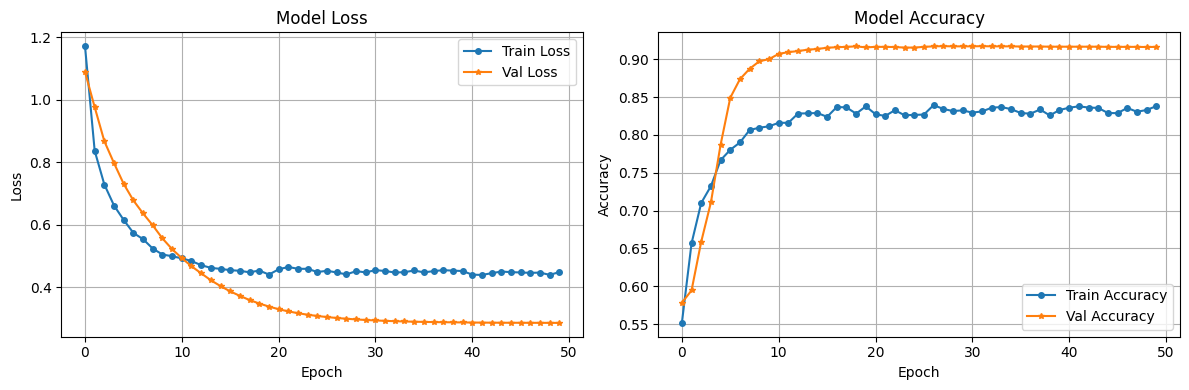

Dataset 2/18 - Session Exp_2025-06-18/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.69%
Maximum validation accuracy : 85.8%


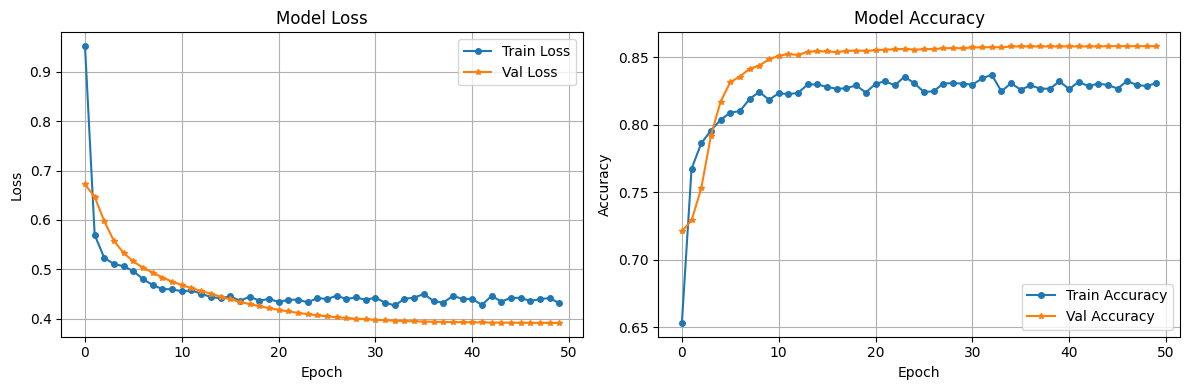

Dataset 3/18 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.47%
Maximum validation accuracy : 91.52%


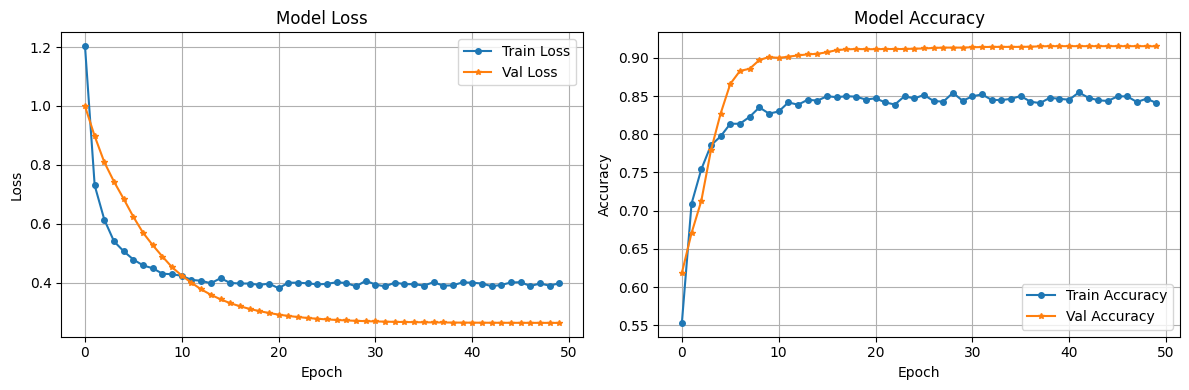

Dataset 4/18 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.48%
Maximum validation accuracy : 92.29%


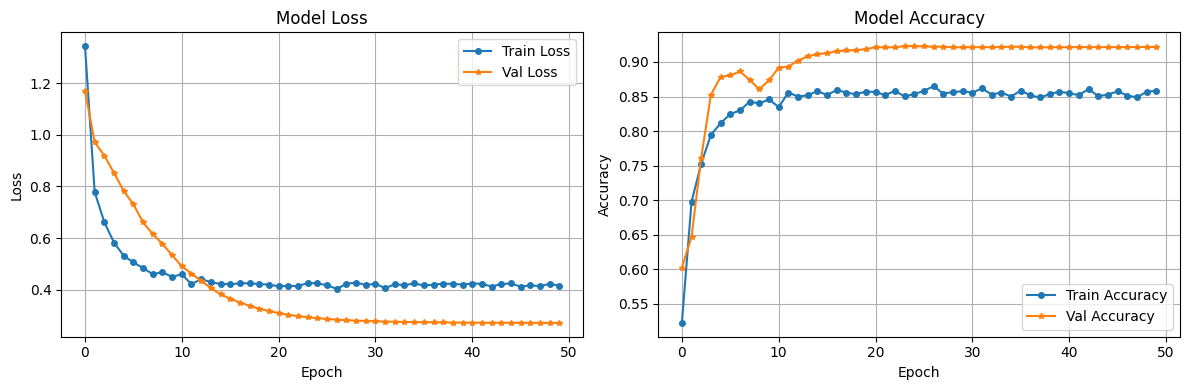

Dataset 5/18 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.99%
Maximum validation accuracy : 91.1%


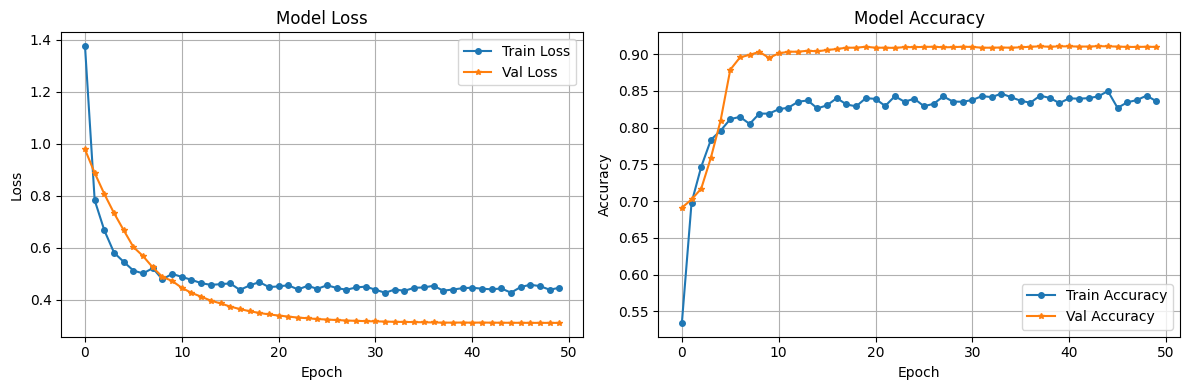

Dataset 6/18 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.34%
Maximum validation accuracy : 85.61%


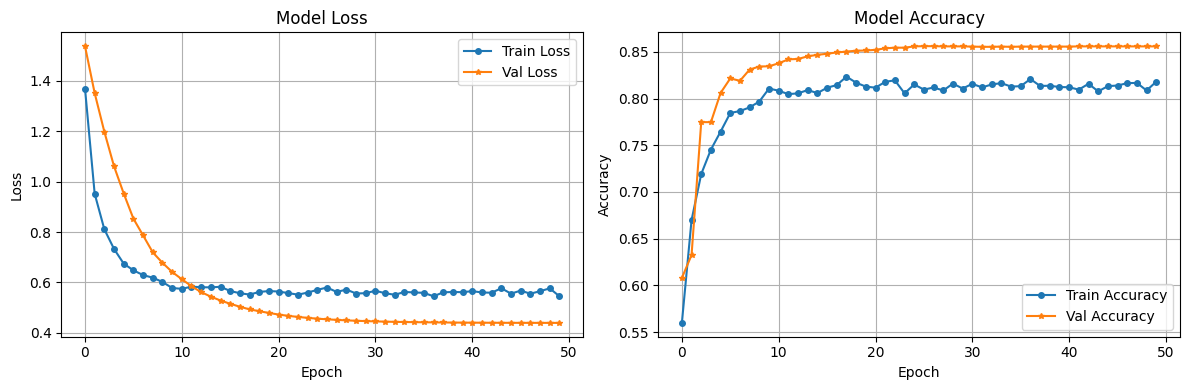

Dataset 7/18 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.41%
Maximum validation accuracy : 93.71%


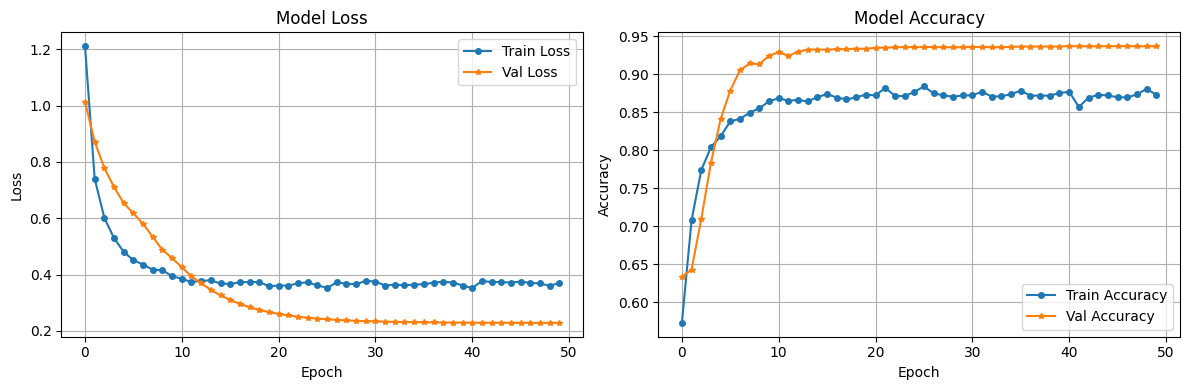

Dataset 8/18 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 80.64%
Maximum validation accuracy : 85.13%


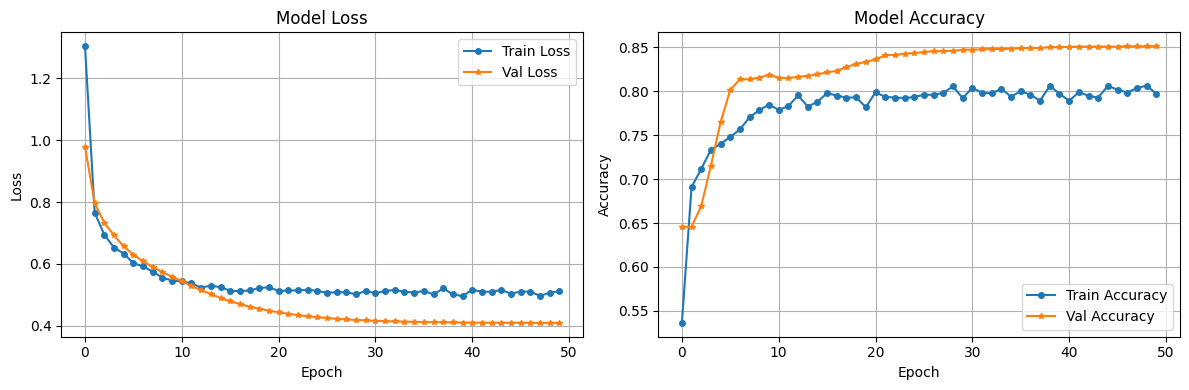

Dataset 9/18 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 79.47%
Maximum validation accuracy : 89.1%


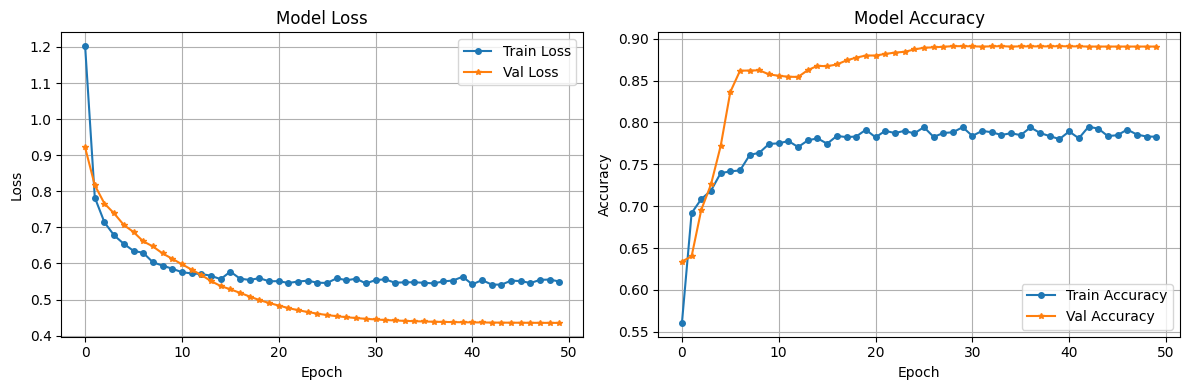

Dataset 10/18 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.39%
Maximum validation accuracy : 94.25%


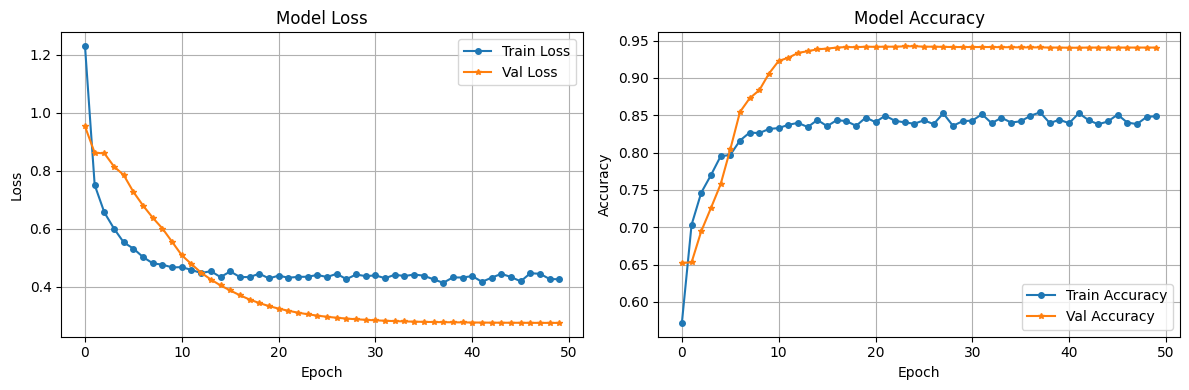

Dataset 11/18 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.97%
Maximum validation accuracy : 93.83%


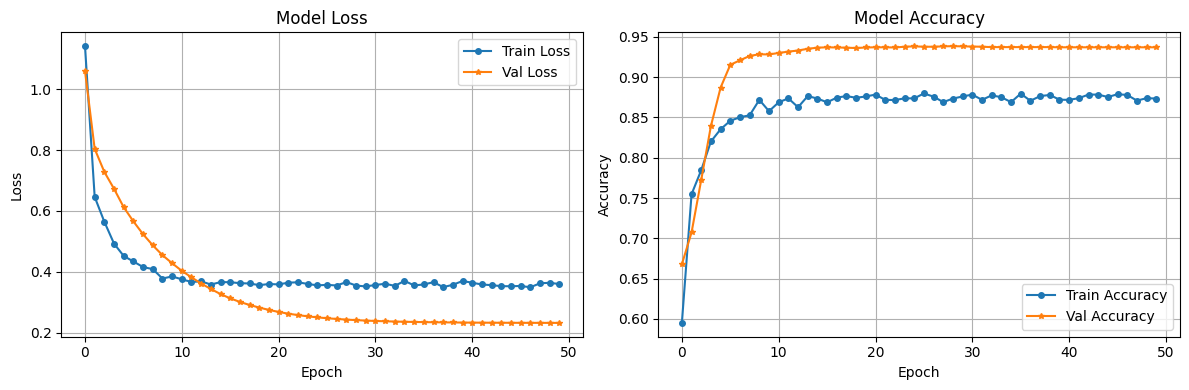

Dataset 12/18 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.32%
Maximum validation accuracy : 92.18%


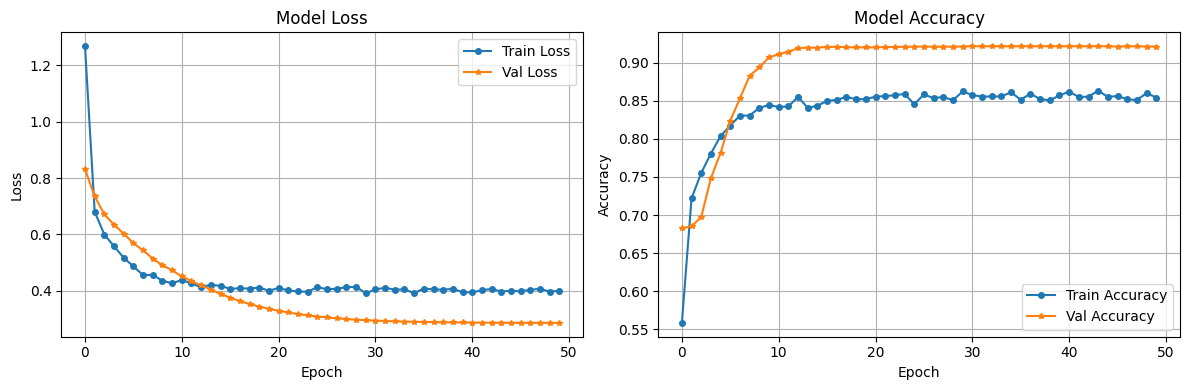

Dataset 13/18 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.06%
Maximum validation accuracy : 90.97%


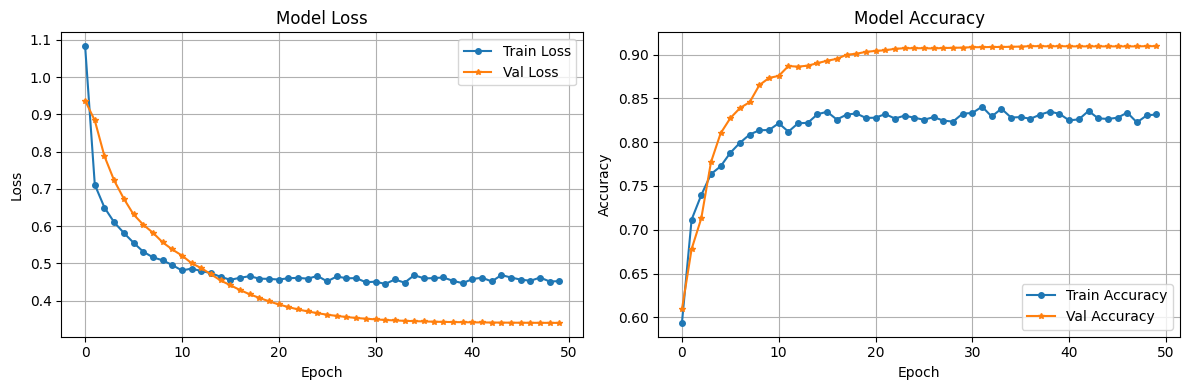

Dataset 14/18 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.66%
Maximum validation accuracy : 92.94%


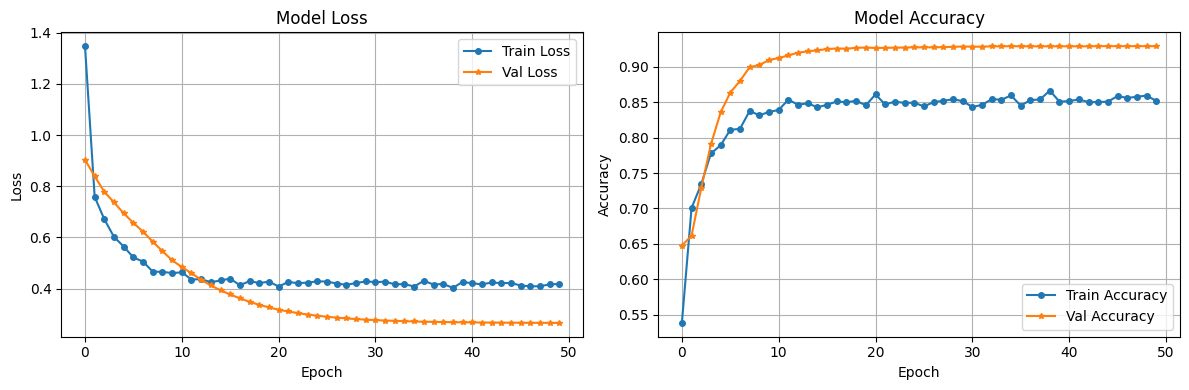

Dataset 15/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.46%
Maximum validation accuracy : 93.16%


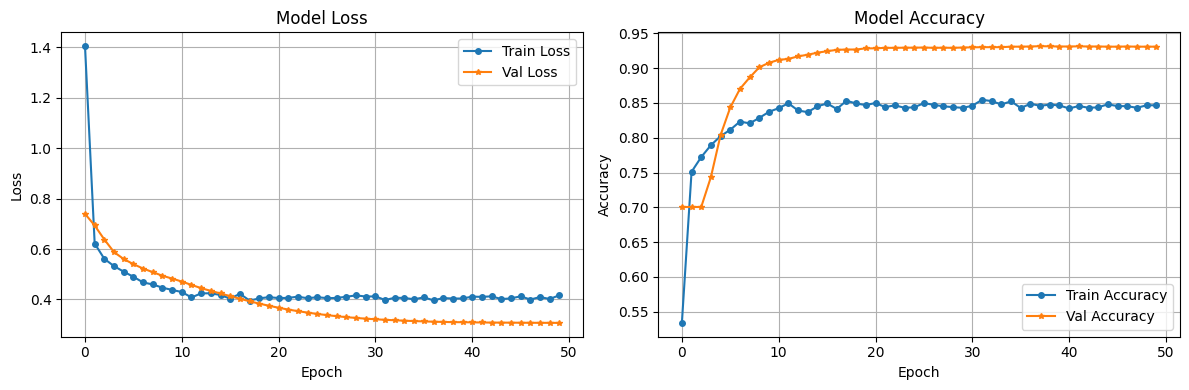

Dataset 16/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.94%
Maximum validation accuracy : 89.93%


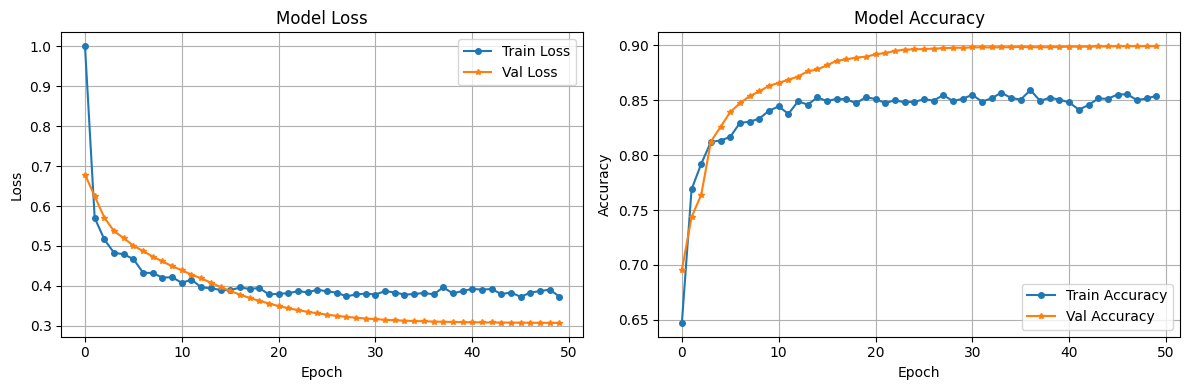

Dataset 17/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.21%
Maximum validation accuracy : 94.92%


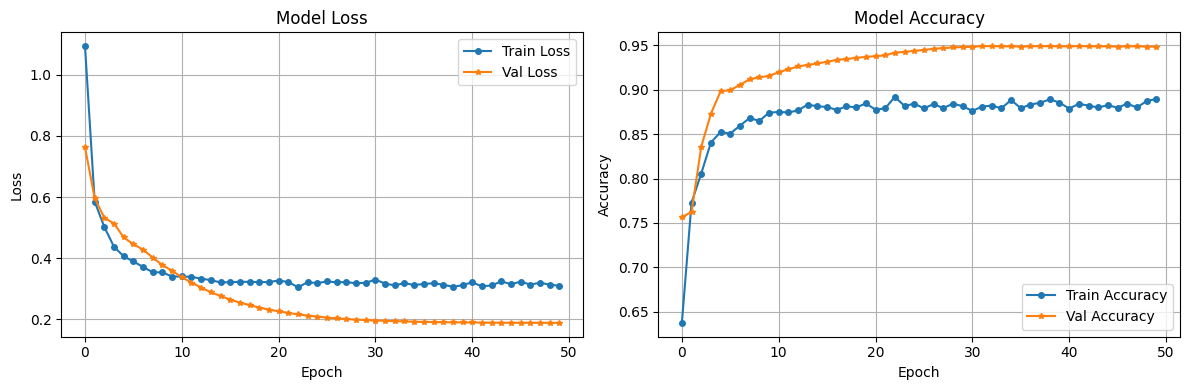

Dataset 18/18 - Session Exp_2025-06-24-v4/E9AD0E7DCC2B/

Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.37%
Maximum validation accuracy : 93.86%


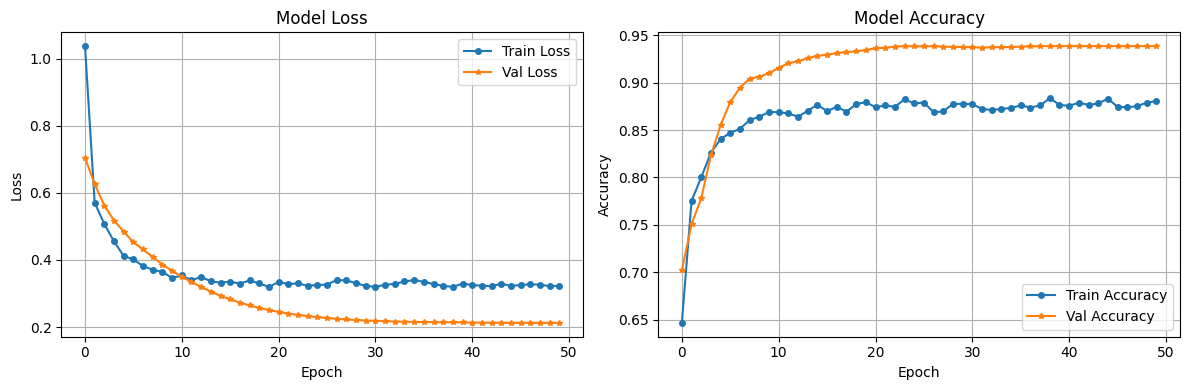

In [3]:
default_path = config.default_path
classes = config.classes

Info = config.Info
dataset = config.dataset

Trained_acc_all, Prev_acc_all, Init_acc_all = [], [], []
X_test_prev_all, y_test_prev_all = [], []
set_epoch, set_batch_size = 50, 256
train_ratio = 0.5
Model_name = "Training_from_scratch"

for idx, sessions in enumerate(dataset):
    print(f"===========================================\nDataset {idx+1}/{len(dataset)} - Session {sessions}\n===========================================\n")
    path = default_path + sessions + 'raw/'
    if idx == 0:
        bool_val = True
    else:
        bool_val = False

    init_acc, test_acc, Prev_acc, X_test_prev_all, y_test_prev_all = get_result(path, classes, train_ratio, set_epoch, set_batch_size, Model_name,
                                                                                X_test_prev_all, y_test_prev_all, First_time=bool_val)

    Init_acc_all.append(init_acc)
    Trained_acc_all.append(test_acc)
    Prev_acc_all.append(Prev_acc)

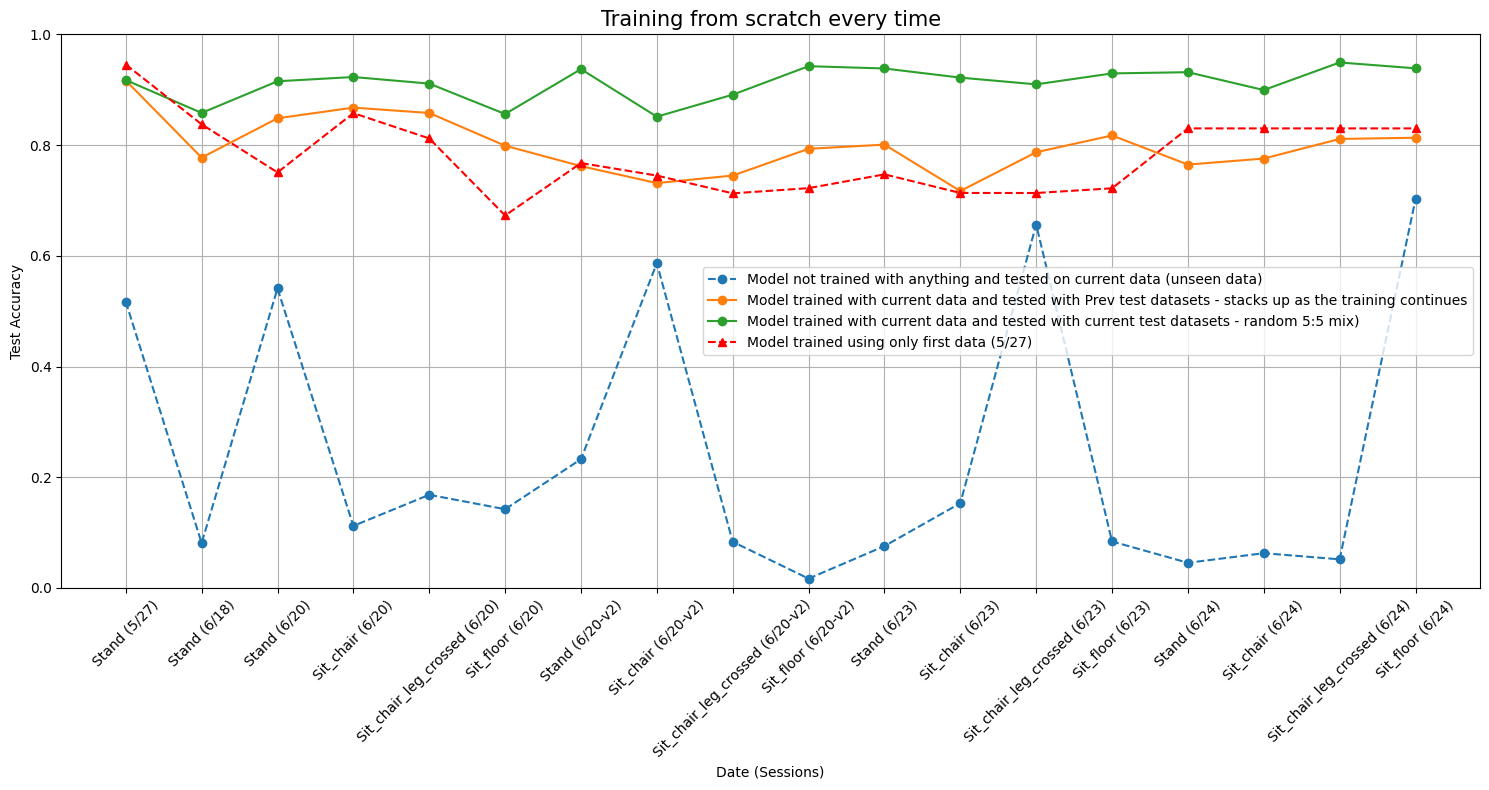

In [7]:
baseline = pd.read_csv('C:/Users/hml76/PycharmProjects/Tremor_project_local/Mindforce/Baseline_results.csv')
#baseline.shape

plt.figure(figsize=(15, 8))
plt.title('Training from scratch every time', fontsize=15)
plt.plot(Info, Init_acc_all, marker='o', label='Model not trained with anything and tested on current data (unseen data)', linestyle='--')
plt.plot(Info, Prev_acc_all, marker='o', label='Model trained with current data and tested with Prev test datasets - stacks up as the training continues')
plt.plot(Info, Trained_acc_all, marker='o', label='Model trained with current data and tested with current test datasets - random 5:5 mix)')
plt.plot(Info, baseline['Accuracy']/100, marker='^', label='Model trained using only first data (5/27)', color='red', linestyle='--')
plt.ylim([0, 1])

plt.xlabel('Date (Sessions)')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
for x in [Init_acc_all, Prev_acc_all, Trained_acc_all]:
    print(f"{np.mean(x)*100:.2f}%")

23.96%
79.92%
91.23%
